In [182]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [183]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [185]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [186]:
df.shape

(5572, 5)

## DATA CLEANINNG

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [189]:
#step1 since the last 3 columns are almost nulls we dop it 

In [190]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [192]:
# renaming the columns

In [193]:
df.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [195]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [196]:
df['target']=encoder.fit_transform(df['target'])

In [197]:
df.head() #ham = 0 ,spam = 1

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [198]:
#now check missing values

In [199]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [200]:
# check for duplicate values

In [201]:
df.duplicated().sum()

403

In [202]:
df = df.drop_duplicates(keep='first')

In [203]:
df.shape

(5169, 2)

In [204]:
df.isnull().sum()

target     0
message    0
dtype: int64

## EDA

In [206]:
import matplotlib.pyplot as plt

In [207]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

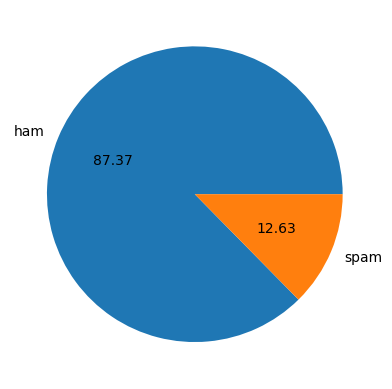

In [208]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [209]:
# conclusion data is imbalnce since ham is more than spam

In [210]:
import nltk

In [211]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalchettri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [213]:
df['no_char']=df['message'].apply(len)

In [214]:
df['no_char'].head()

0    111
1     29
2    155
3     49
4     61
Name: no_char, dtype: int64

In [215]:
#no of words

In [216]:
df['no_words']= df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [217]:
df['no_sentence']= df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [218]:
df.head()

,target,message,no_char,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [219]:
df[['no_char','no_words','no_sentence']].describe()

,no_char,no_words,no_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [220]:
df[df['target']==0][['no_char','no_words','no_sentence']].describe()

,no_char,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [221]:
df[df['target']==1][['no_char','no_words','no_sentence']].describe()

,no_char,no_words,no_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [222]:
import seaborn as sns

<Axes: xlabel='no_char', ylabel='Count'>

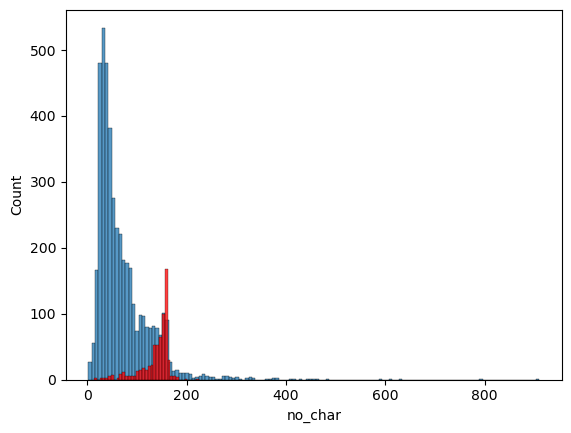

In [223]:
sns.histplot(df[df['target']==0]['no_char'])
sns.histplot(df[df['target']==1]['no_char'],color='red')

<Axes: xlabel='no_words', ylabel='Count'>

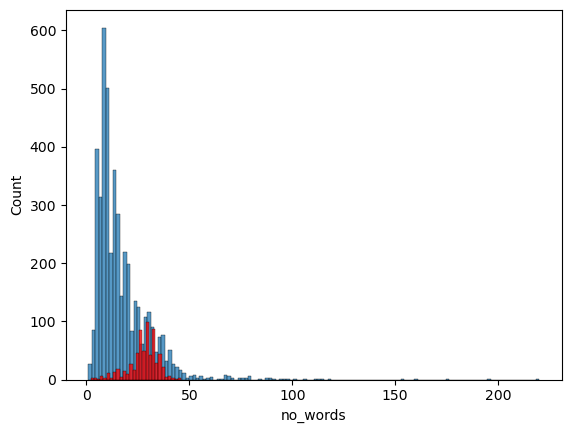

In [224]:
sns.histplot(df[df['target']==0]['no_words'])
sns.histplot(df[df['target']==1]['no_words'],color='red')

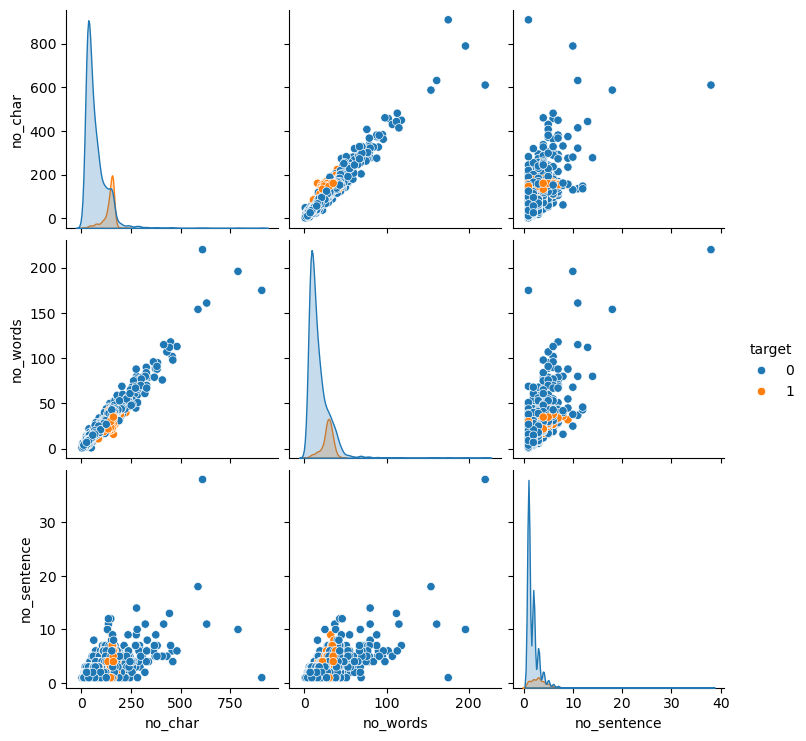

In [225]:
sns.pairplot(df,hue='target')

In [226]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()


<Axes: >

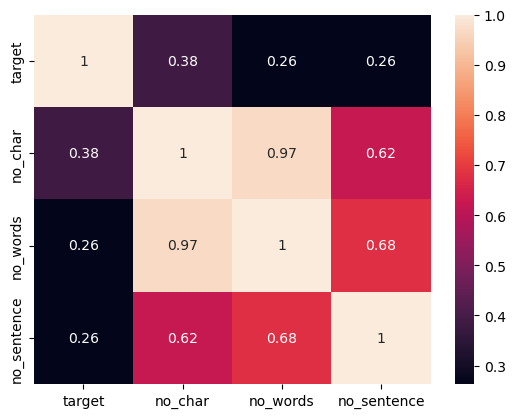

In [227]:
sns.heatmap(df_numeric.corr(),annot= True)

## Text Preprocessing


In [229]:
#steps: 
#1 lower the case
#2 Tokenization
#3 remove special character and unwanted stopwords and punctuations
#4 stemming



In [230]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalchettri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [231]:
    import nltk
    import string
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import PorterStemmer  # Importing the Porter Stemmer
    
    # Download necessary NLTK data
    nltk.download('punkt')
    nltk.download('stopwords')
    
    # Initialize the stopwords and stemmer
    stop_words = set(stopwords.words('english'))  # Load stopwords once
    ps = PorterStemmer()  # Initialize the stemmer
    
    def transform(text):
        # Convert to lowercase
        text = text.lower()
        
        # Tokenize the text
        tokens = word_tokenize(text)
        
        # Remove non-alphanumeric characters
        tokens = [word for word in tokens if word.isalnum()]
        
        # Remove stopwords and punctuation
        tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
        
        # Stemming
        tokens = [ps.stem(word) for word in tokens]  # Apply stemming to each word
    
        return " ".join(tokens)
    
    # Example Usage
    text = "This is an example sentence with some common stopwords!"
    transformed_text = transform(text)
    print(transformed_text)


exampl sentenc common stopword


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalchettri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalchettri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [232]:
transform(df['message'][20])

'serious spell name'

In [233]:
df['proc_message']=df['message'].apply(transform)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   target        5169 non-null   int64 
 1   message       5169 non-null   object
 2   no_char       5169 non-null   int64 
 3   no_words      5169 non-null   int64 
 4   no_sentence   5169 non-null   int64 
 5   proc_message  5169 non-null   object
dtypes: int64(4), object(2)
memory usage: 411.7+ KB


In [235]:
df.head()

,target,message,no_char,no_words,no_sentence,proc_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [236]:
from wordcloud import WordCloud
wc = WordCloud(width=1605,height=850,min_font_size=20,max_words=500,background_color='white')

In [237]:
text = df[df['target'] == 1]['proc_message'].str.cat(sep=" ")
print("Text Length:", len(text))


Text Length: 56971


In [238]:
spam_wc = wc.generate(df[df['target'] == 1]['proc_message'].str.cat(sep=" "))

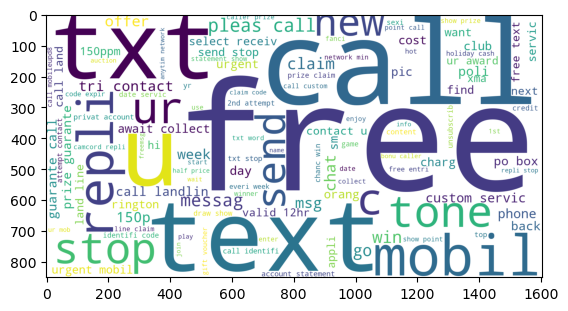

In [239]:
plt.imshow(spam_wc)

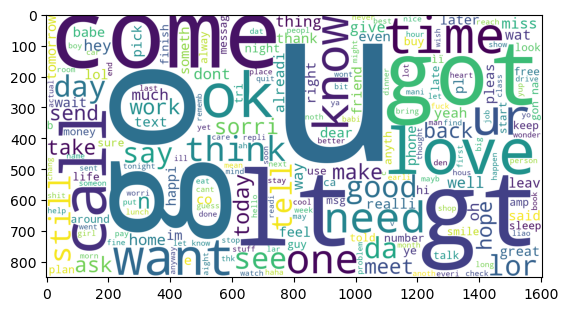

In [240]:
ham_wc = wc.generate(df[df['target'] == 0]['proc_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [241]:
# df[df['target']==1]['proc_message']
# df

In [242]:
spam_corpus = []

# Iterate through spam messages
for msg in df[df['target'] == 1]['proc_message'].tolist():
    for word in msg.split():  # Split message into words
        spam_corpus.append(word)


In [243]:
# spam_corpus
from collections import Counter 

In [244]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [245]:
ham_corpus = []

# Iterate through spam messages
for msg in df[df['target'] == 0]['proc_message'].tolist():
    for word in msg.split():  # Split message into words
        ham_corpus.append(word)


In [246]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


## Model building 

In [409]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [411]:

tfid = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [413]:
X = tfid.fit_transform(df['proc_message']).toarray()

In [415]:
X.shape

(5169, 3000)

In [417]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [419]:
from sklearn.model_selection import train_test_split

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [423]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [425]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [427]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [428]:
#gaussiannb perfomed bad as pecisionn_score is less

In [431]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [433]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [435]:
## after looking at the precision scores of mnb gnb and bnb we see that mnb has 1 precision score so we will use mnb

In [437]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [439]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [441]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [443]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [445]:
train_classifier(svc, X_train, y_train, X_test, y_test)


(0.9758220502901354, 0.9747899159663865)

In [446]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [447]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})
performance_df


,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [448]:
import pickle

In [449]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))